In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 한글 설정
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Window용
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac 용
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프 마이너스까지 나타낼 수 있게

df = pd.read_csv('drinks.csv')


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [15]:
values = df.groupby('continent')['total_servings'].sum().sort_values(ascending=False)
values

continent
EU    21085
AF     4986
AS     4706
SA     4227
OC     2940
Name: total_servings, dtype: int64

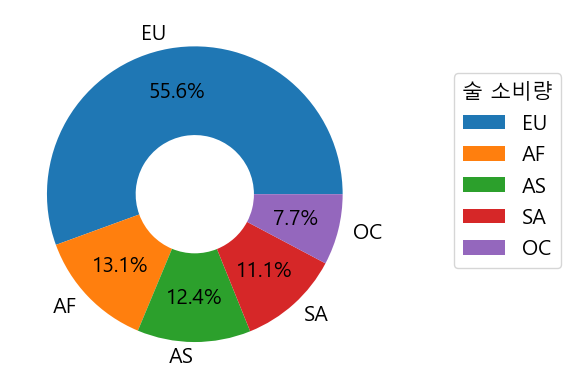

In [36]:
## 대륙별 total_servings 컬럼 추가 대륙별 total_servings 원 그래프로 출력
df['total_servings']= df['beer_servings']+df['spirit_servings']+df['wine_servings']
values = df.groupby('continent')['total_servings'].sum().sort_values(ascending=False)
labels = ['EU','AF','AS','SA','OC']
wedgeprops = {'width':0.6}
plt.pie(values,labels=labels,autopct='%.1f%%',wedgeprops=wedgeprops,pctdistance=0.7)

plt.legend(loc=(1.2,0.3),title='술 소비량')
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
 6   total_servings                193 non-null    int64  
 7   avg                           0 non-null      float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [37]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent', 'total_servings'],
      dtype='object')

In [ ]:
## 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 출력
total_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# total_df
filt = df['total_litres_of_pure_alcohol'].mean() < total_df
total_df[filt]

Index(['AF', 'AS', 'EU', 'OC', 'SA'], dtype='object', name='continent')

In [ ]:
# 대륙별 beer_servings 높은순 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)
df.groupby('continent')['beer_servings'].mean().max() # index의 해당되는 value 값 : 평균맥주 소비량
df.groupby('continent')['beer_servings'].mean().idxmax() # index 출력 : 대륙

'EU'

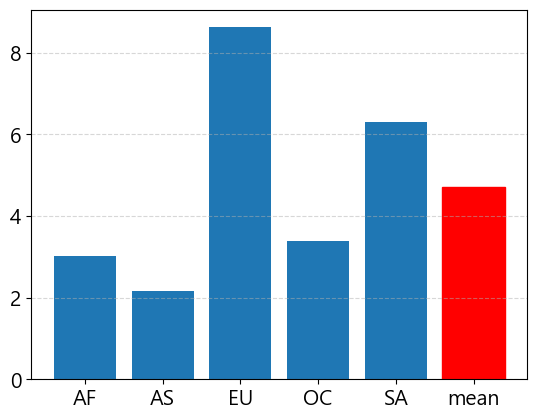

In [120]:
## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력
## 평균 막대그래프 빨간색
data = df['total_litres_of_pure_alcohol'].mean()
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_df['mean'] = data
plt.grid(axis='y',ls='--',alpha=0.5)
con_bar = plt.bar(con_df.index,con_df)
con_bar[len(con_df)-1].set_color('red')



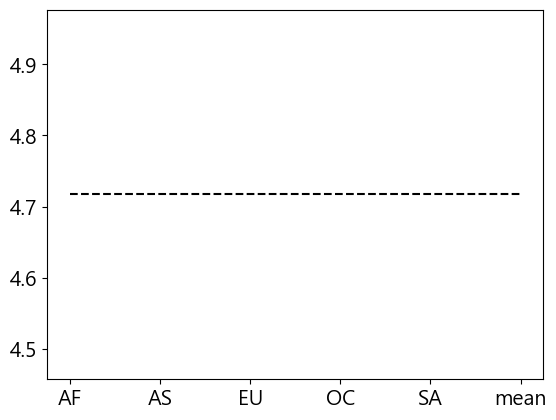

In [119]:
plt.plot(con_df.index,[data]*6,ls="--",color='black')

ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

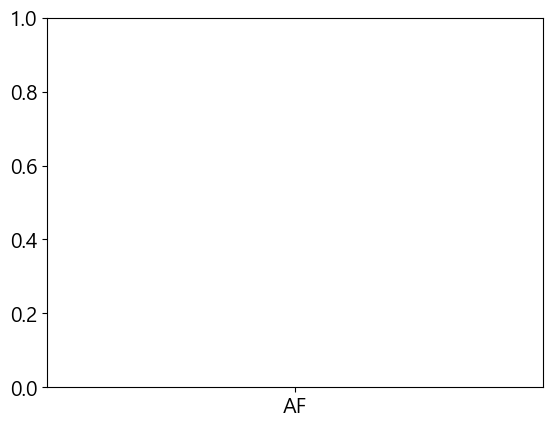

In [110]:
x=total_df.index
y=[data]*6
plt.plot(x,y)